# Explore here

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import joblib  

In [2]:


url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"

df = pd.read_csv(url)
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
df.shape

(3140, 108)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), str(2)
memory usage: 2.6 MB


In [5]:
df.select_dtypes(include="object").columns

/tmp/ipykernel_32712/1196084386.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.select_dtypes(include="object").columns


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='str')

In [6]:
df = df.drop(columns=['COUNTY_NAME', 'STATE_NAME'])

In [7]:
df.select_dtypes(include="object").columns

Index([], dtype='str')

In [8]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 106, dtype: int64

In [9]:
corr = df.corr()["diabetes_prevalence"].sort_values(ascending=False)
corr

diabetes_prevalence                                             1.000000
diabetes_Upper 95% CI                                           0.998409
diabetes_Lower 95% CI                                           0.998069
CKD_Lower 95% CI                                                0.924630
CKD_prevalence                                                  0.918514
                                                                  ...   
Percent of adults with a bachelor's degree or higher 2014-18   -0.669985
CI90UBINC_2018                                                 -0.720364
CI90LBINC_2018                                                 -0.720820
Median_Household_Income_2018                                   -0.723316
MEDHHINC_2018                                                  -0.723316
Name: diabetes_prevalence, Length: 106, dtype: float64

In [10]:
strong_corr = corr[abs(corr) > 0.6]
strong_corr

diabetes_prevalence                                               1.000000
diabetes_Upper 95% CI                                             0.998409
diabetes_Lower 95% CI                                             0.998069
CKD_Lower 95% CI                                                  0.924630
CKD_prevalence                                                    0.918514
CKD_Upper 95% CI                                                  0.906711
anycondition_Lower 95% CI                                         0.856473
Heart disease_Lower 95% CI                                        0.855832
anycondition_prevalence                                           0.850219
anycondition_Upper 95% CI                                         0.842287
PCTPOV017_2018                                                    0.840088
PCTPOV517_2018                                                    0.833527
Heart disease_prevalence                                          0.831021
COPD_Lower 95% CI        

In [11]:
column_drop = [

    "diabetes_Upper 95% CI",
    "diabetes_Lower 95% CI", 
    "CKD_Lower 95% CI",
    "CKD_Upper 95% CI",  
    "anycondition_Lower 95% CI",
    "Heart disease_Lower 95% CI", 
    "anycondition_Upper 95% CI",  
    "COPD_Lower 95% CI",
    "Heart disease_Upper 95% CI",
    "COPD_Upper 95% CI",
    "Obesity_Lower 95% CI",
    "Obesity_Upper 95% CI",
    "MEDHHINC_2018",
]

df =df.drop(columns=column_drop)


In [12]:
corr = df.corr(numeric_only=True)
corr["diabetes_prevalence"].sort_values(ascending=False)

diabetes_prevalence                                             1.000000
CKD_prevalence                                                  0.918514
anycondition_prevalence                                         0.850219
PCTPOV017_2018                                                  0.840088
PCTPOV517_2018                                                  0.833527
                                                                  ...   
Med_HH_Income_Percent_of_State_Total_2018                      -0.561531
Percent of adults with a bachelor's degree or higher 2014-18   -0.669985
CI90UBINC_2018                                                 -0.720364
CI90LBINC_2018                                                 -0.720820
Median_Household_Income_2018                                   -0.723316
Name: diabetes_prevalence, Length: 93, dtype: float64

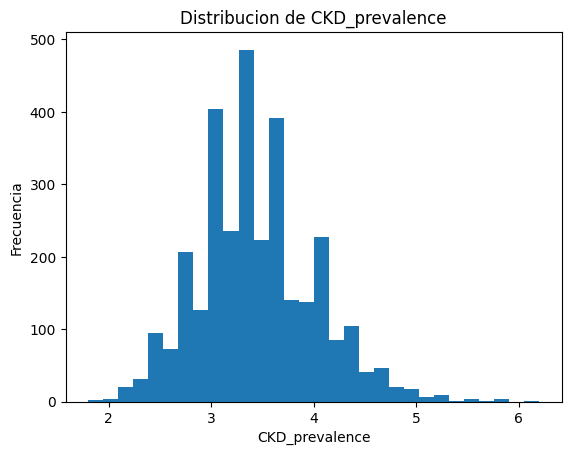

In [13]:


plt.hist(df["CKD_prevalence"], bins=30)
plt.xlabel("CKD_prevalence")
plt.ylabel("Frecuencia")
plt.title("Distribucion de CKD_prevalence")
plt.show()

In [14]:
X = df[[
    "CKD_prevalence",
    "Heart disease_prevalence",
    "COPD_prevalence",
    "Obesity_prevalence",
    "anycondition_prevalence",
    "PCTPOVALL_2018",
    "Median_Household_Income_2018",
    "Percent of adults with less than a high school diploma 2014-18",
    "Percent of adults with a bachelor's degree or higher 2014-18"
]]

y = df["diabetes_prevalence"]

In [15]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:


regre = LinearRegression()
regre.fit(X_train, y_train)
y_pred =regre.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r2: ",r2)
print("MSE: ", mse)

r2:  0.9470021644422953
MSE:  0.4262696445933078


In [17]:
coef_df = X_train.columns.to_frame(name="feature")
coef_df["coef"] = regre.coef_
coef_df.sort_values(by="coef", ascending=False)

,feature,coef
CKD_prevalence,CKD_prevalence,3.780016
COPD_prevalence,COPD_prevalence,0.243905
anycondition_prevalence,anycondition_prevalence,0.146748
Percent of adults with less than a high school diploma 2014-18,Percent of adults with less than a high school...,0.059177
Percent of adults with a bachelor's degree or higher 2014-18,Percent of adults with a bachelor's degree or ...,0.026774
PCTPOVALL_2018,PCTPOVALL_2018,0.015914
Obesity_prevalence,Obesity_prevalence,0.012742
Median_Household_Income_2018,Median_Household_Income_2018,0.000017
Heart disease_prevalence,Heart disease_prevalence,-0.460669


In [18]:


lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 Lasso:", r2_lasso)

R2 Lasso: 0.9216525361152396


In [19]:


alphas = np.linspace(0.01, 20, 50) 
r2_scores = []  


In [20]:


for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000) 
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

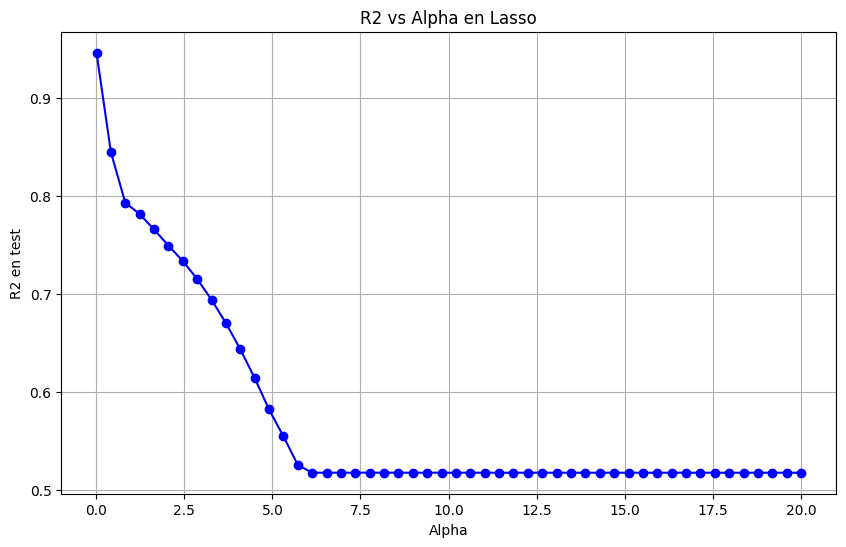

In [21]:


plt.figure(figsize=(10,6))
plt.plot(alphas, r2_scores, marker='o', color='blue')
plt.xlabel("Alpha")
plt.ylabel("R2 en test")
plt.title("R2 vs Alpha en Lasso")
plt.grid(True)
plt.show()

In [22]:
best_idx = np.argmax(r2_scores)
best_alpha = alphas[best_idx]

lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train, y_train)

coef_df = X_train.columns.to_frame(name="feature")
coef_df["coef"] = lasso_best.coef_
coef_df.sort_values(by="coef", ascending=False)
coef_df

,feature,coef
CKD_prevalence,CKD_prevalence,3.345000
Heart disease_prevalence,Heart disease_prevalence,-0.284125
COPD_prevalence,COPD_prevalence,0.175687
Obesity_prevalence,Obesity_prevalence,0.009057
anycondition_prevalence,anycondition_prevalence,0.149877
PCTPOVALL_2018,PCTPOVALL_2018,0.027428
Median_Household_Income_2018,Median_Household_Income_2018,0.000018
Percent of adults with less than a high school diploma 2014-18,Percent of adults with less than a high school...,0.063807
Percent of adults with a bachelor's degree or higher 2014-18,Percent of adults with a bachelor's degree or ...,0.026016


In [23]:
best_idx = np.argmax(r2_scores)
best_alpha = alphas[best_idx]

print("Mejor alpha:", best_alpha)
print("R² correspondiente:", r2_scores[best_idx])

Mejor alpha: 0.01
R² correspondiente: 0.9461149880958409


In [24]:


lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",np.float64(0.01)
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",10000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [25]:


coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": lasso_best.coef_
}).sort_values(by="coef", ascending=False)

coef_df

,feature,coef
0,CKD_prevalence,3.345000
2,COPD_prevalence,0.175687
4,anycondition_prevalence,0.149877
7,Percent of adults with less than a high school...,0.063807
5,PCTPOVALL_2018,0.027428
8,Percent of adults with a bachelor's degree or ...,0.026016
3,Obesity_prevalence,0.009057
6,Median_Household_Income_2018,0.000018
1,Heart disease_prevalence,-0.284125


In [26]:
y_pred_lasso = lasso_best.predict(X_test)

In [27]:
r2 = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print("R² en test:", r2)
print("MSE en test:", mse)
print("RMSE en test:", rmse)

R² en test: 0.9461149880958409
MSE en test: 0.4334053387573262
RMSE en test: 0.6583352783782183


In [28]:
y_pred_lr = regre.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("R² LinearRegression:", r2_lr)
print("RMSE LinearRegression:", rmse_lr)

R² LinearRegression: 0.9470021644422953
RMSE LinearRegression: 0.6528932872938026


In [29]:


joblib.dump(lasso_best, "../models/lasso_diabetes_model.pkl")



['../models/lasso_diabetes_model.pkl']